In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Carregar o arquivo CSV com separador correto
file_path = "C:/Users/tacio/Documents/Python Scripts/Dados Copa do Mundo/Fifa_world_cup_matches.csv"
wc = pd.read_csv(file_path, sep=';')

In [6]:
# Converter os valores de posse de bola para numérico
wc["possession team1"] = wc["possession team1"].str.replace(",", ".").astype(float)
wc["possession team2"] = wc["possession team2"].str.replace(",", ".").astype(float)

In [7]:
# Criar um novo dataframe com a posse de bola associada a cada seleção
teams_possession = pd.concat([
    wc[["team1", "possession team1"]].rename(columns={"team1": "team", "possession team1": "possession"}),
    wc[["team2", "possession team2"]].rename(columns={"team2": "team", "possession team2": "possession"})
])

In [8]:
# Calcular a média de posse de bola por seleção
avg_possession = teams_possession.groupby("team")["possession"].mean().sort_values(ascending=False).head(10)

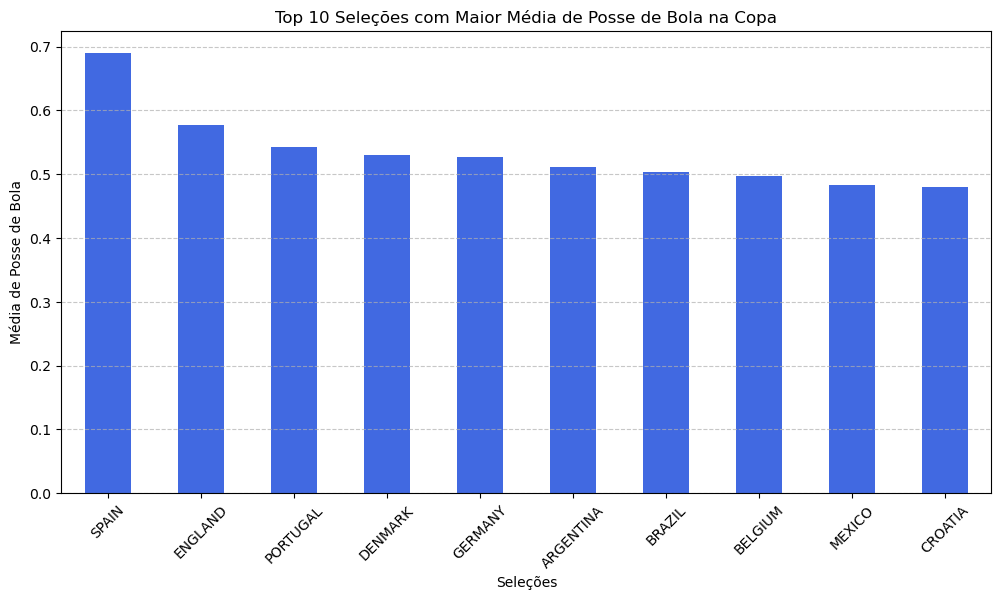

In [9]:
# Criar a visualização
plt.figure(figsize=(12, 6))
avg_possession.plot(kind="bar", color="royalblue")
plt.xlabel("Seleções")
plt.ylabel("Média de Posse de Bola")
plt.title("Top 10 Seleções com Maior Média de Posse de Bola na Copa")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [10]:
# Agrupar as quebras de linha bem-sucedidas por seleção
quebras_linha_team1 = wc.groupby("team1")["completed defensive line breaksteam1"].sum()
quebras_linha_team2 = wc.groupby("team2")["completed defensive line breaks team2"].sum()

In [11]:
# Combinar os valores para obter a soma total por seleção
quebras_linha_total = quebras_linha_team1.add(quebras_linha_team2, fill_value=0)

In [12]:
# Selecionar as 10 seleções com maior quantidade de quebras de linha bem-sucedidas
top_10_selecoes = quebras_linha_total.nlargest(10)

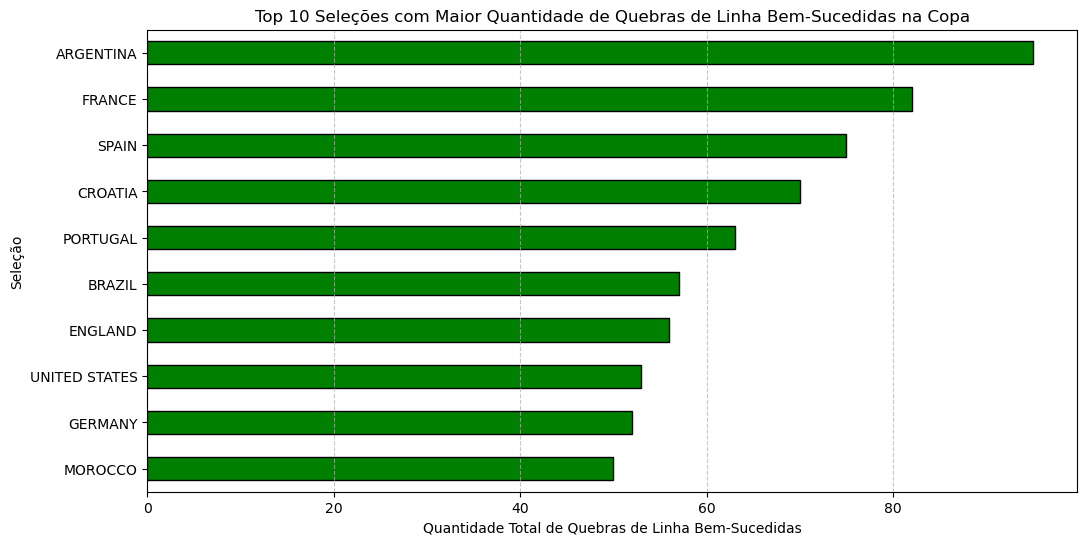

In [13]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))
top_10_selecoes.sort_values().plot(kind="barh", color="green", edgecolor="black")
plt.xlabel("Quantidade Total de Quebras de Linha Bem-Sucedidas")
plt.ylabel("Seleção")
plt.title("Top 10 Seleções com Maior Quantidade de Quebras de Linha Bem-Sucedidas na Copa")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [15]:
# Agrupar as tentativas de quebras de linha por seleção
tentativas_quebras_linha_team1 = wc.groupby("team1")["attempted defensive line breaks team1"].sum()
tentativas_quebras_linha_team2 = wc.groupby("team2")["attempted defensive line breaks team2"].sum()

In [16]:
# Combinar os valores para obter a soma total por seleção
tentativas_quebras_linha_total = tentativas_quebras_linha_team1.add(tentativas_quebras_linha_team2, fill_value=0)

In [17]:
# Selecionar as 10 seleções com maior quantidade de tentativas de quebras de linha bem-sucedidas
top_10_selecoes = tentativas_quebras_linha_total.nlargest(10)

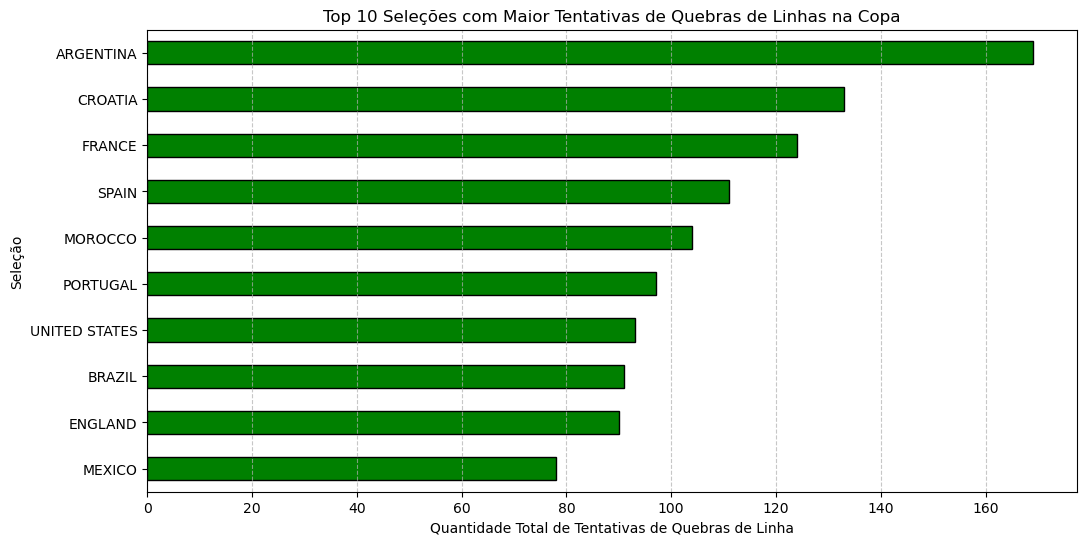

In [30]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))
top_10_selecoes.sort_values().plot(kind="barh", color="green", edgecolor="black")
plt.xlabel("Quantidade Total de Tentativas de Quebras de Linha")
plt.ylabel("Seleção")
plt.title("Top 10 Seleções com Maior Tentativas de Quebras de Linhas na Copa")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [31]:
# Calcula o índice de aproveitamento (porcentagem de sucesso)
indice_aproveitamento = (quebras_linha_total / tentativas_quebras_linha_total) * 100

In [20]:
# Ordena as seleções pelo índice de aproveitamento (do maior para o menor)
top_10_aproveitamento = indice_aproveitamento.nlargest(10)

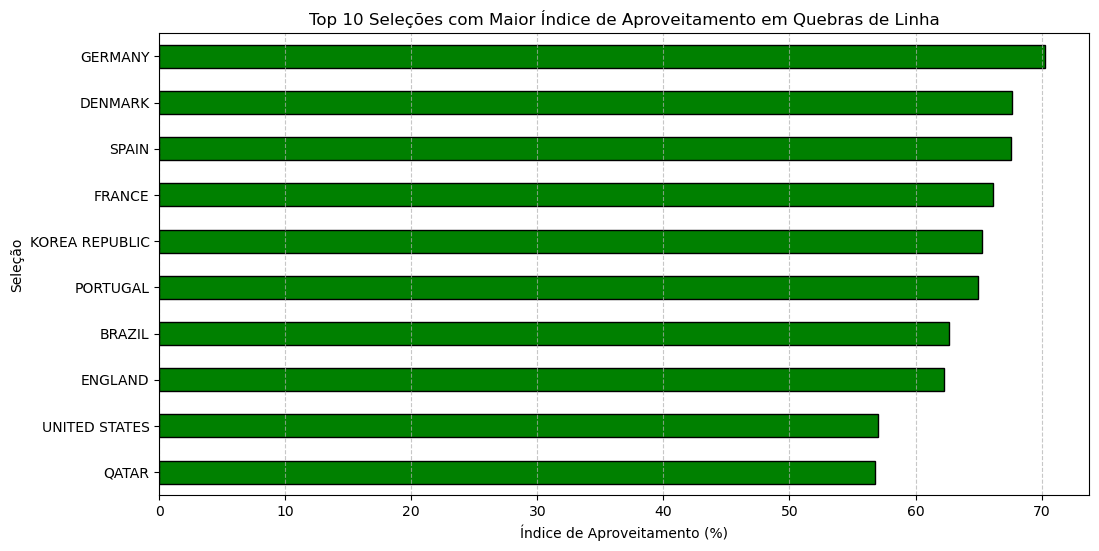

In [26]:
# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_aproveitamento.sort_values().plot(kind="barh", color="green", edgecolor="black")
plt.xlabel("Índice de Aproveitamento (%)")
plt.ylabel("Seleção")
plt.title("Top 10 Seleções com Maior Índice de Aproveitamento em Quebras de Linha")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [23]:
# Agrupar os Turnovers forçados por cada seleção
Turnovers_forçados_team1 = wc.groupby("team1")["forced turnovers team1"].sum()
Turnovers_forçados_team2 = wc.groupby("team2")["forced turnovers team2"].sum()

In [24]:
# Combinar os valores para obter a soma total por seleção
Turnovers_forçados_total = Turnovers_forçados_team1.add(Turnovers_forçados_team2, fill_value=0)

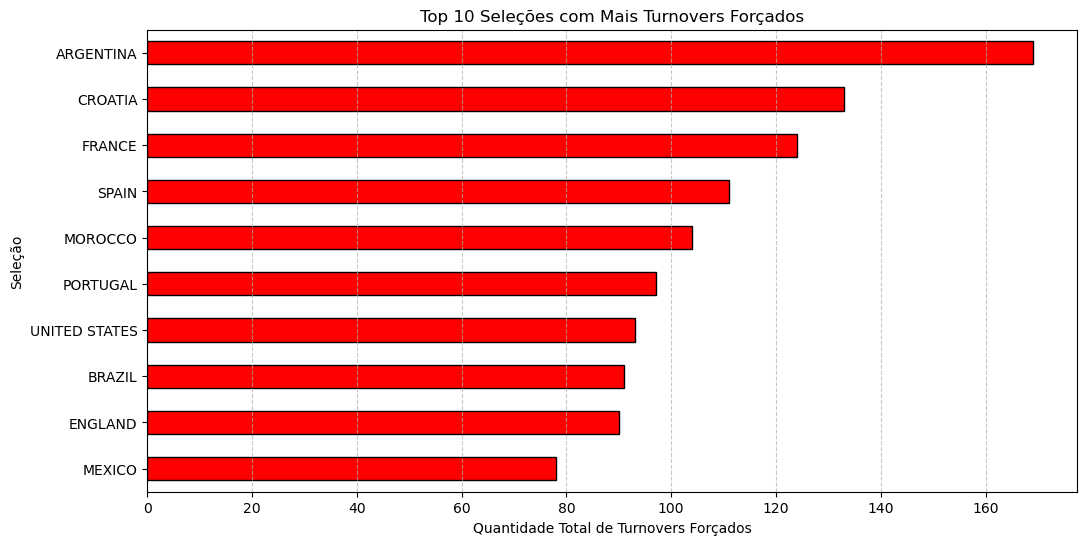

In [25]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))
top_10_selecoes.sort_values().plot(kind="barh", color="red", edgecolor="black")
plt.xlabel("Quantidade Total de Turnovers Forçados")
plt.ylabel("Seleção")
plt.title("Top 10 Seleções com Mais Turnovers Forçados")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [27]:
# Agrupar a qtde de Pressões defensivas por cada seleção
Pressões_defensivas_aplicadas_time1 = wc.groupby("team1")["defensive pressures applied team1"].sum()
Pressões_defensivas_aplicadas_time2 = wc.groupby("team2")["defensive pressures applied team2"].sum()

In [28]:
# Combinar os valores para obter a soma total por seleção
Pressões_defensivas_aplicadas_total = Pressões_defensivas_aplicadas_time1.add(Pressões_defensivas_aplicadas_time1, fill_value=0)

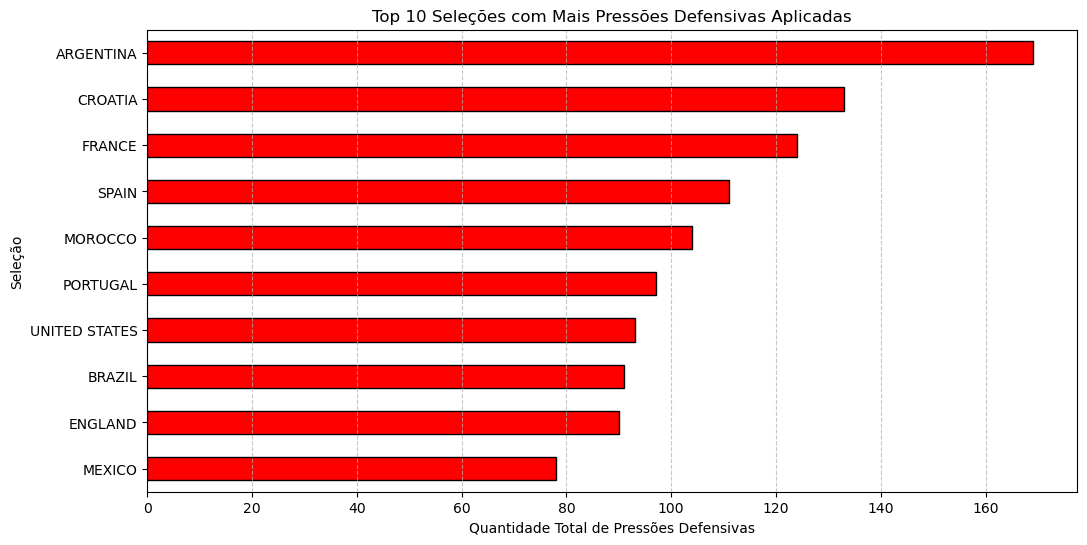

In [29]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))
top_10_selecoes.sort_values().plot(kind="barh", color="red", edgecolor="black")
plt.xlabel("Quantidade Total de Pressões Defensivas")
plt.ylabel("Seleção")
plt.title("Top 10 Seleções com Mais Pressões Defensivas Aplicadas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [32]:
# Calcula o índice de aproveitamento (porcentagem de sucesso)
indice_aproveitamento = (Turnovers_forçados_total / Pressões_defensivas_aplicadas_total) * 100

In [33]:
# Ordena as seleções pelo índice de aproveitamento (do maior para o menor)
top_10_aproveitamento = indice_aproveitamento.nlargest(10)

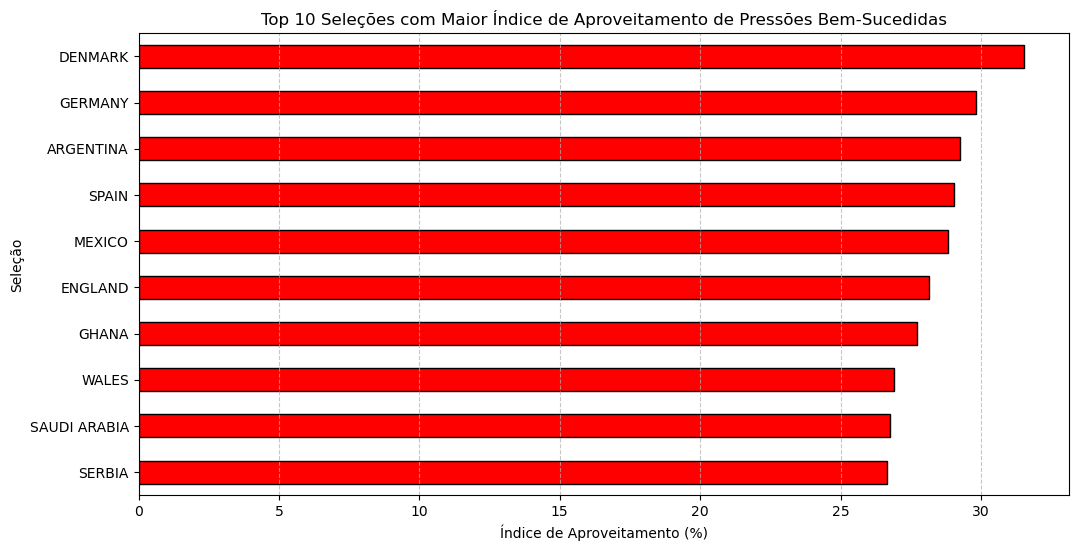

In [34]:
# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_aproveitamento.sort_values().plot(kind="barh", color="red", edgecolor="black")
plt.xlabel("Índice de Aproveitamento (%)")
plt.ylabel("Seleção")
plt.title("Top 10 Seleções com Maior Índice de Aproveitamento de Pressões Bem-Sucedidas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()